In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importation des données

x_train = pd.read_csv('./Dataset/training_set/x_train.csv')
x_test = pd.read_csv('./Dataset/testing_set/x_test.csv')
y_train = pd.read_csv('./Dataset/training_set/y_train.csv').squeeze()
y_test = pd.read_csv('./Dataset/testing_set/y_test.csv').squeeze()


In [3]:
# Entrainement du modele
# Initialisation du modele
model = LinearRegression()

# Entrainer le modele sur les donnees d'entrainement donc x_train et y_train
model.fit(x_train, y_train)

# Coefficients du modele
print("Coefficients du modele: ", model.coef_)
print("Intercept du modele: ", model.intercept_)

Coefficients du modele:  [ -1.98119929   1.99210598 -19.32224517   0.6005856    0.89661135]
Intercept du modele:  23.04093087393649


In [4]:
# Prediction de la variable cible
y_pred = model.predict(x_test)
y_pred

array([ 4.96247565, 16.3306144 , 15.0518685 , ..., 14.66879414,
        8.5592576 , 14.5634112 ])

In [5]:
# Evaluation du modele
# Calcul des valeur mediane absolue 
mae = mean_absolute_error(y_test,y_pred)
# Calcul des racines absolues
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(f"Mean Absolute error :{mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute error :14.209656252940897
Root Mean Squared Error: 21.228671035464817


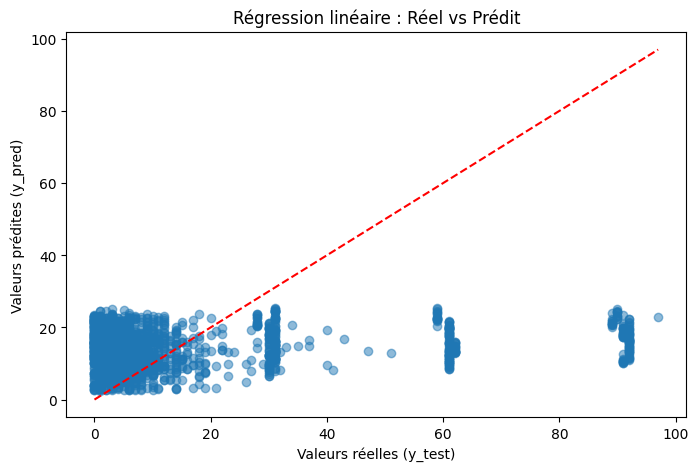

In [6]:
# Visualization 
# Comparer les valeurs réelles et prédites
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Ligne parfaite
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Valeurs prédites (y_pred)")
plt.title("Régression linéaire : Réel vs Prédit")
plt.show()

In [7]:
# Exploration des features pour savoir lequel des features influent le plus sur la prediction ou la valeur cible

# Affichage des coefficients des features
feature_importance = pd.DataFrame({
    'Feature' : x_train.columns,
    'Coefficient' : model.coef_
})

# Trier des valeurs obtenues dans feature_importance par ordre decroissant en filtrant par le coefficient

feature_importance =  feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)

                           Feature  Coefficient
1  TYPE OF ADMISSION-EMERGENCY/OPD     1.992106
4                           GENDER     0.896611
3                 ADMISSION_SEASON     0.600586
0                              AGE    -1.981199
2                  ADMISSION_MONTH   -19.322245


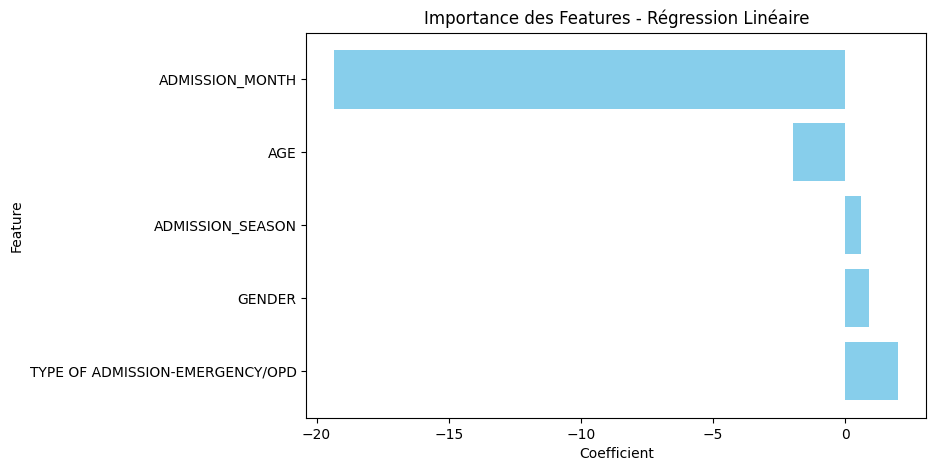

In [8]:
# Visualisation des coefficients
# Visualiser l'importance des features

plt.figure(figsize=(8, 5))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Importance des Features - Régression Linéaire")
plt.show()


In [9]:
# Sauvegarde du modele entrainé avec la regression linéaire 
import joblib
joblib.dump(model, './Models/linear_regression_model.pkl')

['./Models/linear_regression_model.pkl']